# 헬스케어 빅데이터 분석의 정석(김선일) chap9_practice

시계열 데이터를 활용하여 노인의 활동량 데이터 시각화하기

In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

데이터 불러오기

In [411]:
data = pd.read_csv('./practice_1_OTg6QzA_activities.csv')
print(data.shape)
data

(66281, 4)


,timestamp,X,Y,Z
0,2022-01-01 00:01:40.363,33,76,56
1,2022-01-01 00:01:42.961,34,87,56
2,2022-01-01 00:01:45.562,25,89,47
3,2022-01-01 00:01:48.163,11,70,50
4,2022-01-01 00:02:08.864,33,72,58
...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136
66277,2022-01-31 23:28:41.683,-89,145,138
66278,2022-01-31 23:28:49.383,-93,138,137
66279,2022-01-31 23:32:36.426,-93,131,137


거리 및 속도 산출을 위한 (t-1)데이터 열을 추가

In [412]:
#시간 데이터 추가
data['timestamp'] = pd.to_datetime(data['timestamp']) #시계열 데이터로 변환환
data['p_timestamp'] = data['timestamp'].shift(1)
#위치 데이터 추가
data['p_x'] = data['X'].shift(1)
data['p_y'] = data['Y'].shift(1)
data['p_z'] = data['Z'].shift(1)
data

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
0,2022-01-01 00:01:40.363,33,76,56,NaT,NaN,NaN,NaN
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0
...,...,...,...,...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136,2022-01-31 23:27:55.381,-92.0,127.0,138.0
66277,2022-01-31 23:28:41.683,-89,145,138,2022-01-31 23:28:00.481,-91.0,143.0,136.0
66278,2022-01-31 23:28:49.383,-93,138,137,2022-01-31 23:28:41.683,-89.0,145.0,138.0
66279,2022-01-31 23:32:36.426,-93,131,137,2022-01-31 23:28:49.383,-93.0,138.0,137.0


계산을 위한 NaN값 삭제

In [413]:
data_unNaN = data.dropna()
data_unNaN

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0
...,...,...,...,...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136,2022-01-31 23:27:55.381,-92.0,127.0,138.0
66277,2022-01-31 23:28:41.683,-89,145,138,2022-01-31 23:28:00.481,-91.0,143.0,136.0
66278,2022-01-31 23:28:49.383,-93,138,137,2022-01-31 23:28:41.683,-89.0,145.0,138.0
66279,2022-01-31 23:32:36.426,-93,131,137,2022-01-31 23:28:49.383,-93.0,138.0,137.0


거리를 계산하고 열을 추가

In [414]:
data_unNaN.loc[:,'dist'] = np.sqrt((data_unNaN['X'] - data_unNaN['p_x'])**2
                            + (data_unNaN['Y'] - data_unNaN['p_y'])**2
                            + (data_unNaN['Z'] - data_unNaN['p_z'])**2)
    #정육면체의 대각선 길이라고 생각
data_unNaN


C:\Users\302-1\AppData\Local\Temp\ipykernel_3096\1905117140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unNaN.loc[:,'dist'] = np.sqrt((data_unNaN['X'] - data_unNaN['p_x'])**2


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111
...,...,...,...,...,...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136,2022-01-31 23:27:55.381,-92.0,127.0,138.0,16.155494
66277,2022-01-31 23:28:41.683,-89,145,138,2022-01-31 23:28:00.481,-91.0,143.0,136.0,3.464102
66278,2022-01-31 23:28:49.383,-93,138,137,2022-01-31 23:28:41.683,-89.0,145.0,138.0,8.124038
66279,2022-01-31 23:32:36.426,-93,131,137,2022-01-31 23:28:49.383,-93.0,138.0,137.0,7.000000


시간의 차분을 구하고 열에 추가

In [415]:
#데이터를 불러온 후 timestamp를 시계열로 변환하고 오자
'''
data_unNaN['d_time'] = (data_unNaN['timestamp'] - data_unNaN['p_timestamp']).total_seconds()
data_unNaN
'''
#시리즈에 total_secomds() 적용 불가
def cal_time(df):
    return (df['timestamp'] - df['p_timestamp']).total_seconds()
    
data_unNaN['d_time'] = data_unNaN.apply(cal_time, axis=1) #열의 항목마다 적용해서 시리즈가 아닌 객체에 적용시키기
data_unNaN

C:\Users\302-1\AppData\Local\Temp\ipykernel_3096\2787659725.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unNaN['d_time'] = data_unNaN.apply(cal_time, axis=1) #열의 항목마다 적용해서 시리즈가 아닌 객체에 적용시키기


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901
...,...,...,...,...,...,...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136,2022-01-31 23:27:55.381,-92.0,127.0,138.0,16.155494,5.100
66277,2022-01-31 23:28:41.683,-89,145,138,2022-01-31 23:28:00.481,-91.0,143.0,136.0,3.464102,41.202
66278,2022-01-31 23:28:49.383,-93,138,137,2022-01-31 23:28:41.683,-89.0,145.0,138.0,8.124038,7.700
66279,2022-01-31 23:32:36.426,-93,131,137,2022-01-31 23:28:49.383,-93.0,138.0,137.0,7.000000,227.043


속도 계산 후 열 추가

In [416]:
def cal_act(df):
    if df['d_time'] != 0:
        return df['dist'] / df['d_time']
    else:
        return 0
data_unNaN['activity'] = data_unNaN.apply(cal_act, axis=1)
data_unNaN


C:\Users\302-1\AppData\Local\Temp\ipykernel_3096\1025809423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unNaN['activity'] = data_unNaN.apply(cal_act, axis=1)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,activity
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,0.980475
...,...,...,...,...,...,...,...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136,2022-01-31 23:27:55.381,-92.0,127.0,138.0,16.155494,5.100,3.167744
66277,2022-01-31 23:28:41.683,-89,145,138,2022-01-31 23:28:00.481,-91.0,143.0,136.0,3.464102,41.202,0.084076
66278,2022-01-31 23:28:49.383,-93,138,137,2022-01-31 23:28:41.683,-89.0,145.0,138.0,8.124038,7.700,1.055070
66279,2022-01-31 23:32:36.426,-93,131,137,2022-01-31 23:28:49.383,-93.0,138.0,137.0,7.000000,227.043,0.030831


시각화 하기

<Axes: title={'center': 'calculation of activity'}, xlabel='time series', ylabel='activity [cm/sec]'>

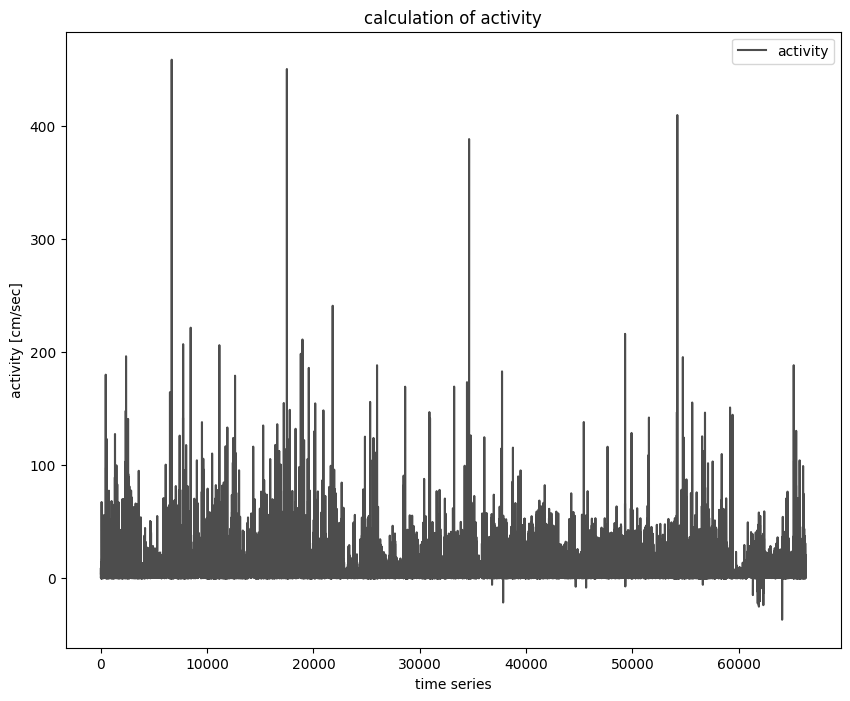

In [417]:
data_activity=data_unNaN[['timestamp', 'activity']]
plt.rc('figure', figsize=(10, 8))

data_activity.plot(y='activity', color='0.3', 
                   title='calculation of activity', xlabel='time series', ylabel='activity [cm/sec]')


timestamp를 행인덱스로 변환

In [418]:
data_activity = data_activity.set_index('timestamp')

10분당 평균으로 리셈플링 하여 시각화

<Axes: title={'center': 'resample by 10min'}, xlabel='timestamp', ylabel='average of activity [cm/sex]'>

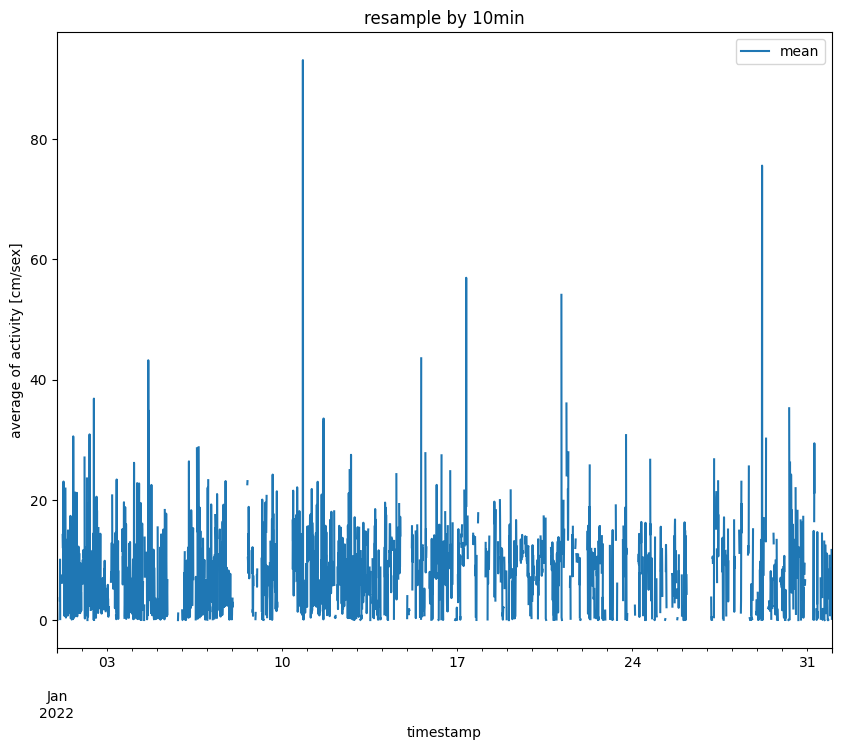

In [419]:
ten_m = data_activity.resample('10min')
result = ten_m['activity'].agg(['mean', 'min', 'max'])

result.plot(y='mean', title='resample by 10min', xlabel='timestamp', ylabel='average of activity [cm/sex]')

C:\Users\302-1\AppData\Local\Temp\ipykernel_3096\2799615642.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  a_H = data_activity.resample('1H')


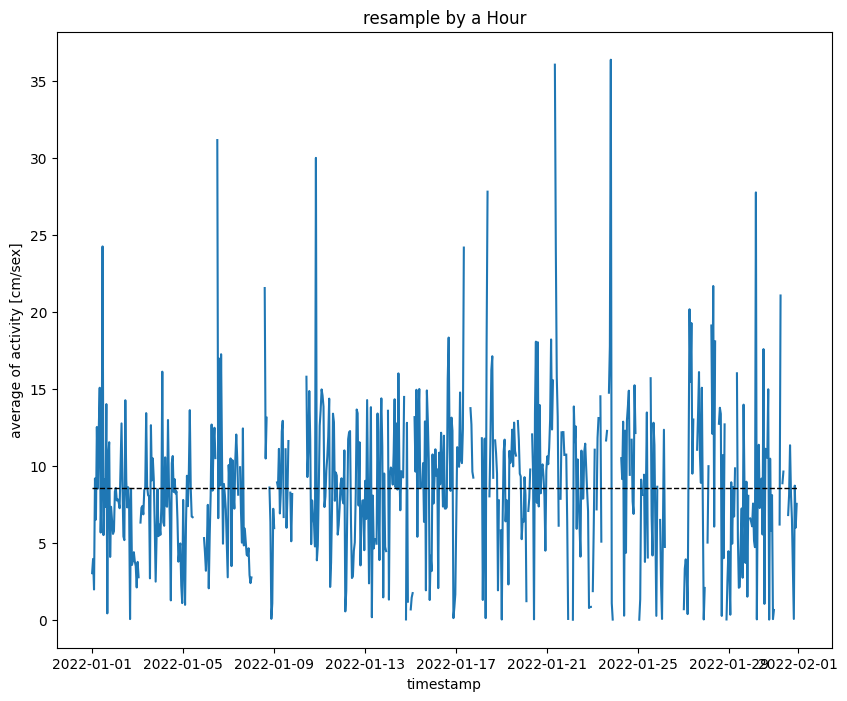

In [420]:
#1시간 단위 평균으로 리셈플링
a_H = data_activity.resample('1H')
result = a_H['activity'].agg(['mean', 'min', 'max'])

#시각화
plt.plot(result['mean'])
plt.title('resample by a Hour')
plt.xlabel('timestamp')
plt.ylabel('average of activity [cm/sex]')

#평균선 그리기
plt.hlines(result['mean'].mean(), min(result.index), max(result.index), linestyle='--', linewidth=1, colors='k')


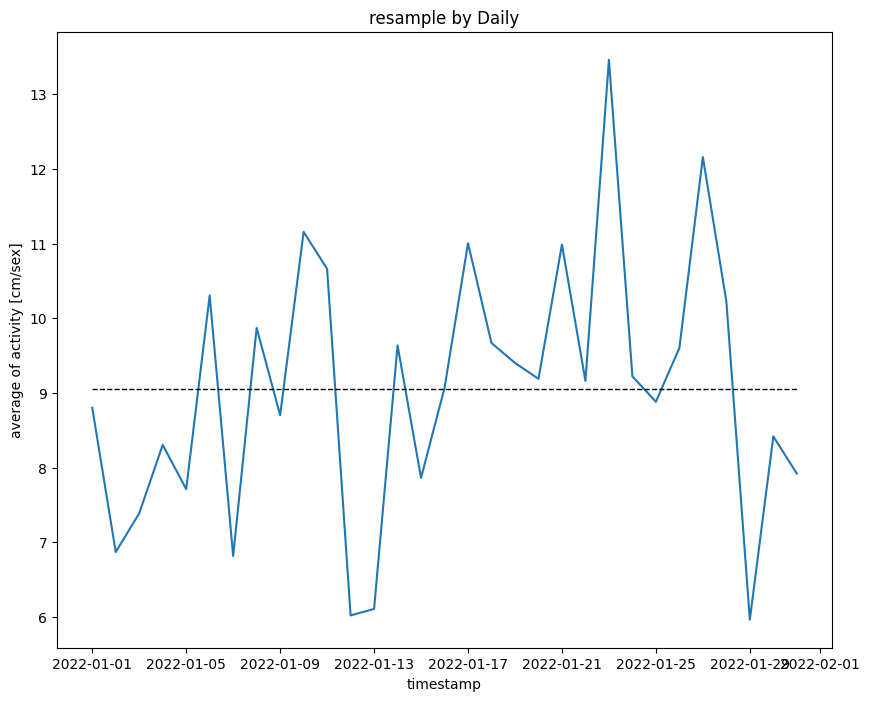

In [421]:
#일 단위 평균으로 리셈플링
a_D = data_activity.resample('D')
result = a_D['activity'].agg(['mean', 'min', 'max'])

#시각화
plt.plot(result['mean'])
plt.title('resample by Daily')
plt.xlabel('timestamp')
plt.ylabel('average of activity [cm/sex]')

#평균선 그리기
plt.hlines(result['mean'].mean(), min(result.index), max(result.index), linestyle='--', linewidth=1, colors='k')


가장 활동량이 많았던 날은?(일평균의 최댓값)

In [422]:
day_max_active = result['mean'].idxmax()
max_active = result['mean'].max()
print(day_max_active, max_active)

2022-01-23 00:00:00 13.462308654492224


22.01.23의 데이터만 가지고 활동량 시각화

In [423]:
data_220123 = data_activity.loc['2022-01-23']
data_220123


,activity
timestamp,
2022-01-23 00:40:27.190,0.024997
2022-01-23 00:40:29.691,2.153205
2022-01-23 00:40:32.291,1.762529
2022-01-23 00:40:34.883,1.767969
2022-01-23 00:40:37.484,5.491294
...,...
2022-01-23 19:34:23.278,17.706852
2022-01-23 19:39:23.938,0.218355
2022-01-23 20:07:20.155,0.048759


<Axes: title={'center': 'activity on 22.01.23'}, xlabel='time series', ylabel='activity [cm/sec]'>

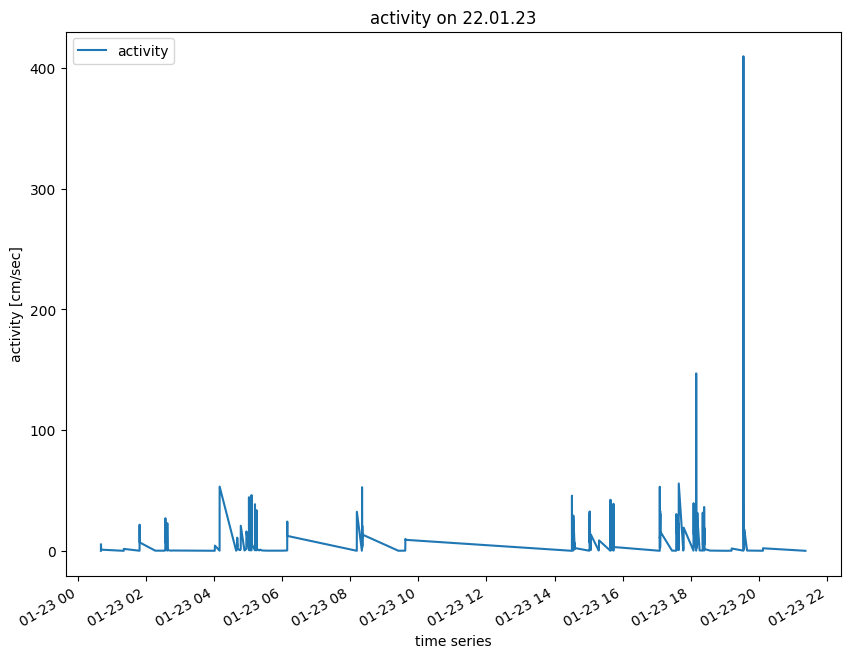

In [424]:
plt.rc('figure', figsize=(10, 8))

data_220123.plot(use_index=True, y='activity', 
                   title='activity on 22.01.23', xlabel='time series', ylabel='activity [cm/sec]')

자료가 넘 많으니 리셈플링

<Axes: title={'center': 'resample by 10min'}, xlabel='timestamp', ylabel='average of activity [cm/sex]'>

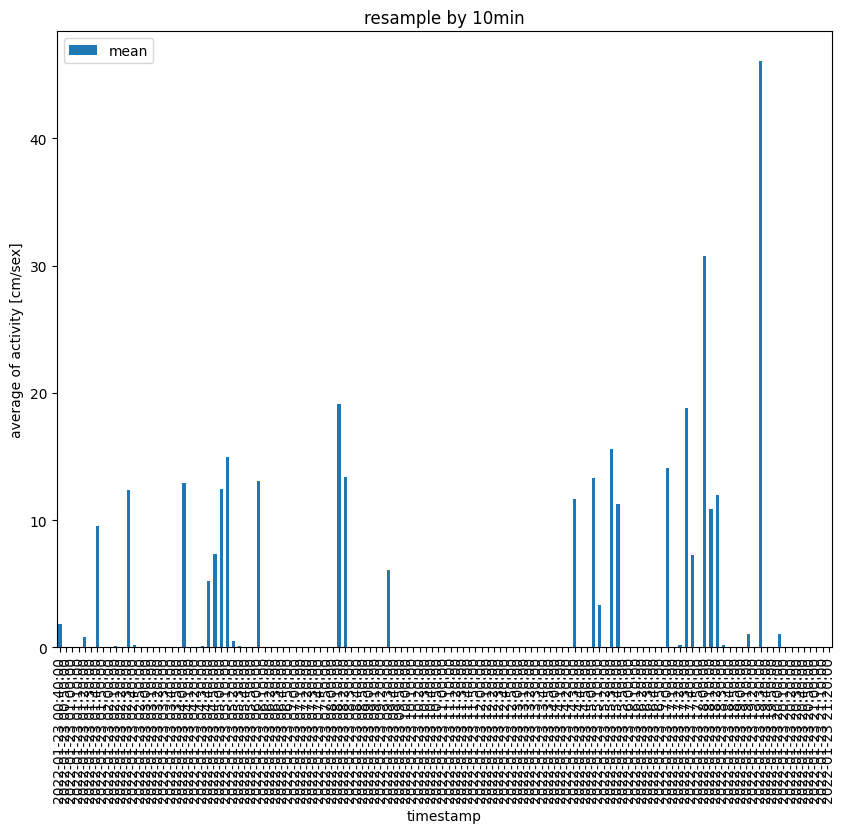

In [425]:
ten_m_220123 = data_220123.resample('10min')
result = ten_m_220123['activity'].agg(['mean'])
#활동이 없던 시간 드랍
result = result.fillna(value=0)
result.plot.bar(y='mean', title='resample by 10min', xlabel='timestamp', ylabel='average of activity [cm/sex]')




조금 더 줄이도록 하자

                          mean
timestamp                     
2022-01-23 00:00:00   1.857077
2022-01-23 01:00:00   6.049693
2022-01-23 02:00:00  11.044107
2022-01-23 03:00:00   0.000000
2022-01-23 04:00:00   7.166089
2022-01-23 05:00:00  11.807514
2022-01-23 06:00:00  13.099983
2022-01-23 07:00:00   0.000000
2022-01-23 08:00:00  14.510846
2022-01-23 09:00:00   5.072357
2022-01-23 10:00:00   0.000000
2022-01-23 11:00:00   0.000000
2022-01-23 12:00:00   0.000000
2022-01-23 13:00:00   0.000000
2022-01-23 14:00:00  11.641865
2022-01-23 15:00:00  12.264561
2022-01-23 16:00:00   0.000000
2022-01-23 17:00:00  14.744644
2022-01-23 18:00:00  17.756475
2022-01-23 19:00:00  36.371071
2022-01-23 20:00:00   1.069861
2022-01-23 21:00:00   0.009919


<Axes: title={'center': 'resample by 10min'}, xlabel='timestamp', ylabel='average of activity [cm/sex]'>

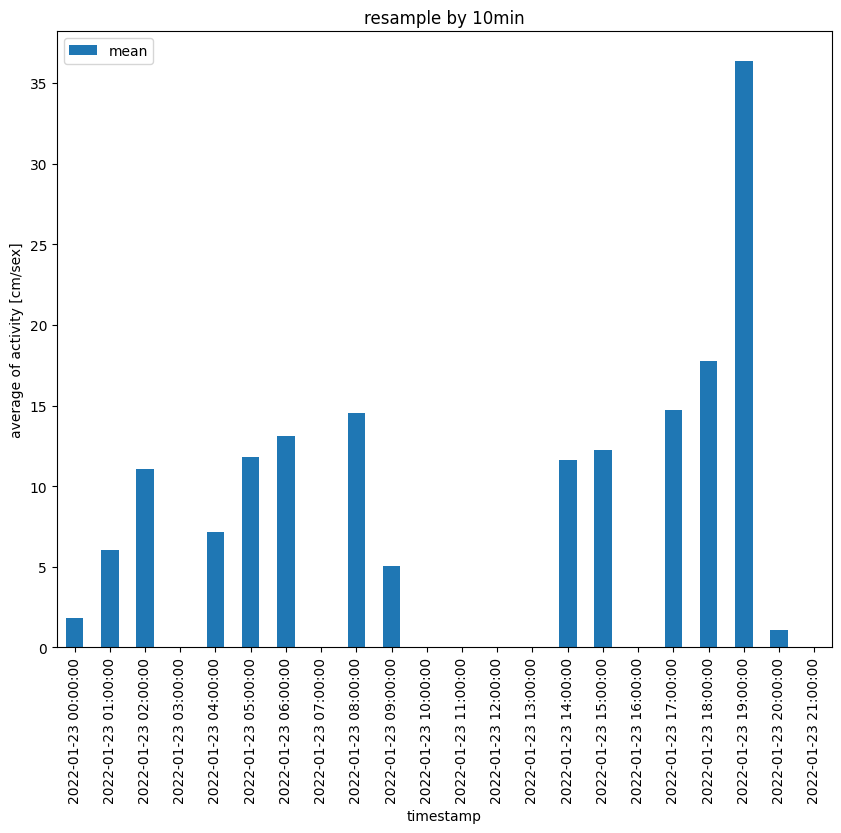

In [426]:
a_H_220123 = data_220123.resample('h')
result = a_H_220123['activity'].agg(['mean'])
#활동이 없던 시간은 0으로 표시시
result = result.fillna(value=0)
print(result)
result.plot.bar(y='mean', title='resample by 10min', xlabel='timestamp', ylabel='average of activity [cm/sex]')